# Import Libraries

In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [19]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [20]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [21]:
rows = 5
digits_per_row = 5

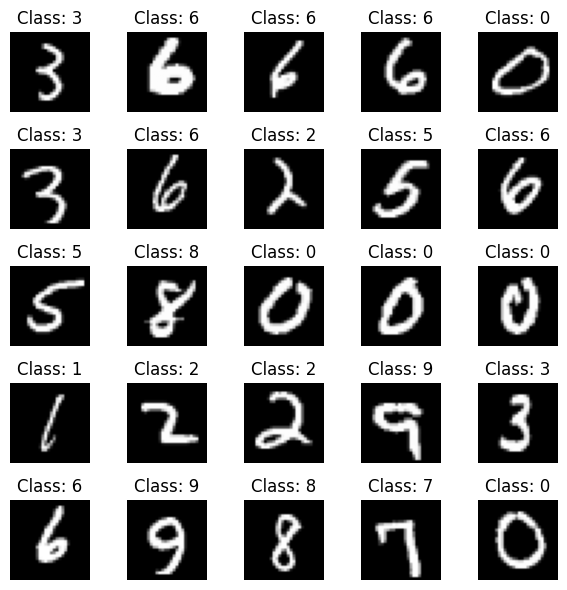

In [22]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [23]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [24]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.0005
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 15

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8191 - loss: 3.3779 - val_accuracy: 0.9170 - val_loss: 0.4004
Epoch 2/15
 254/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9242 - loss: 0.3529

# Display Loss and Accuracy per Training Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


| Hidden Layers    | Dropout | LR     | Activation | Epochs | Accuracy (Val) |
| ---------------- | ------- | ------ | ---------- | ------ | -------------- |
| \[128, 64]       | 0.2     | 0.001  | relu       | 10     | \~0.98         |
| \[256, 128]      | 0.3     | 0.001  | relu       | 10     | \~0.984        |
| \[512, 256, 128] | 0.4     | 0.0005 | relu       | 15     | \~0.986        |

## 2. Validation: Show 1 misclassified digit from each class.

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

misclassified_indices = np.where(predicted_classes != true_classes)[0]

misclassified_by_class = {}
for index in misclassified_indices:
    true_class = true_classes[index]
    if true_class not in misclassified_by_class:
        misclassified_by_class[true_class] = index

plt.figure(figsize=(12, 8))
for i in range(10):
    if i in misclassified_by_class:
        index = misclassified_by_class[i]
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
        plt.title(f'True: {i}, Pred: {predicted_classes[index]}')
        plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

In [ ]:
# Rebuild the model with Batch Normalization layers
def build_model_with_bn(units, activation, dropout_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(784,), name='input'),
        tf.keras.layers.Dense(units=units[0], name='hidden-1'),
        tf.keras.layers.BatchNormalization(), # Add Batch Normalization
        tf.keras.layers.Activation(activation), # Apply activation after BN
        tf.keras.layers.Dropout(dropout_rate), # Add Dropout

        tf.keras.layers.Dense(units=units[1], name='hidden-2'),
        tf.keras.layers.BatchNormalization(), # Add Batch Normalization
        tf.keras.layers.Activation(activation), # Apply activation after BN
        tf.keras.layers.Dropout(dropout_rate), # Add Dropout

        tf.keras.layers.Dense(units=units[2], name='hidden-3'),
        tf.keras.layers.BatchNormalization(), # Add Batch Normalization
        tf.keras.layers.Activation(activation), # Apply activation after BN
        tf.keras.layers.Dropout(dropout_rate), # Add Dropout

        tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
    ])
    return model

# Best hyperparameters from previous step
best_units = [512, 256, 128]
best_activation = 'relu'
best_dropout_rate = 0.4
best_learning_rate = 0.0005
best_epochs = 15 # Can potentially increase this with Early Stopping

# Convert y_train and y_test back to original labels for ImageDataGenerator compatibility
y_train_labels = tf.argmax(y_train, axis=1).numpy()
y_test_labels = tf.argmax(y_test, axis=1).numpy()

# Reshape x_train and x_test for Data Augmentation
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

# Data Augmentation setup
# We can increase the augmentation parameters slightly
datagen = ImageDataGenerator(
    rotation_range=15,       # increased rotation
    zoom_range=0.15,         # increased zoom
    width_shift_range=0.1,   # add width shift
    height_shift_range=0.1   # add height shift
)

# Fit the data generator on the training data
datagen.fit(x_train_reshaped)

# Re-one-hot encode labels for training the model
y_train_cat = tf.one_hot(y_train_labels, depth=10)
y_test_cat = tf.one_hot(y_test_labels, depth=10)


# Build the model with Batch Normalization and best hyperparameters
model_improved = build_model_with_bn(best_units, best_activation, best_dropout_rate)

# Compile the model
# Keep the original optimizer as requested in the problem context, but note that changing it could be a workflow improvement
optimizer_improved = tf.keras.optimizers.SGD(learning_rate=best_learning_rate)
model_improved.compile(optimizer=optimizer_improved, loss=loss, metrics=metrics)

model_improved.summary()

# Train the model using Data Augmentation
history_improved = model_improved.fit(
    datagen.flow(x_train_reshaped, y_train_cat, batch_size=128),
    epochs=best_epochs,
    validation_data=(x_test_reshaped, y_test_cat)
)

# Display Loss and Accuracy per Training Epoch for the improved model
train_loss_improved = history_improved.history['loss']
val_loss_improved = history_improved.history['val_loss']
train_acc_improved = history_improved.history['accuracy']
val_acc_improved = history_improved.history['val_accuracy']

plt.plot(train_loss_improved, label='Train Loss (Improved)')
plt.plot(val_loss_improved, label='Validation Loss (Improved)')
plt.title('Improved Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, best_epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(train_acc_improved, label='Train Accuracy (Improved)')
plt.plot(val_acc_improved, label='Validation Accuracy (Improved)')
plt.title('Improved Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, best_epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()



## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow